# Model Selection  

Les technique pour : 

- entrainer un modele

- Optimiser un modele

=> Avec la bonne methodologie 

On vas voire :

- Train_test_split : cree un train_set et un test_set

- Validation set : 

- Cross Validation : valide un modele 

- GridSearchCV : améliorer un modele 

- Learning Curves : améliorer un modele

- Exercice

# Attention !!!

il ne faut JAMAIS evaluer la performance d'un modele sur les donnees d'entrainement

Dans le machine learning on devise toujours nos donnee en 2 partie :

- Train set : pour entrainer notre modele (80%) (x_tarin, y_train)

-> model.fit(x_tarin, y_train)

- Test set : pour tester notre modele (20%) (x_test, y_test)

-> model.fit(x_test, y_test)

Pour faire tout ca dans python on utilise le module Model Selection et la methode:

model.train_test_split(\*arrays, ...) Split arrays or matrices


In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.datasets import load_iris 
import seaborn as sns

(150, 4)
(150,)


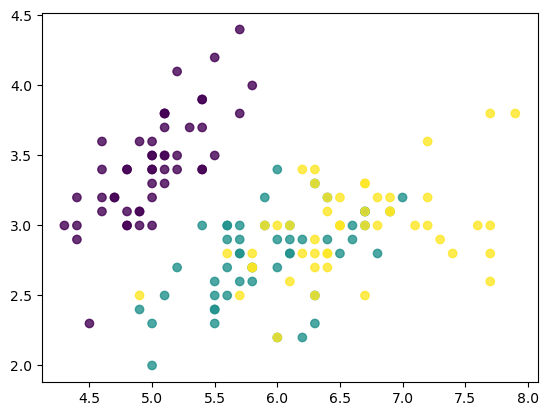

In [2]:
iris = load_iris()

x = iris.data 
y = iris.target
print(x.shape)
print(y.shape)
plt.scatter(x[:,0], x[:,1], c=y, alpha=0.8)

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
# Diviser les données en ensembles d'entraînement et de test
# (80% Train & 20% Test)
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2,random_state=5
)

In [5]:
print("Train set :",X_train.shape)
print("Test set :",X_test.shape)

Train set : (120, 4)
Test set : (30, 4)


Text(0.5, 1.0, 'Test set')

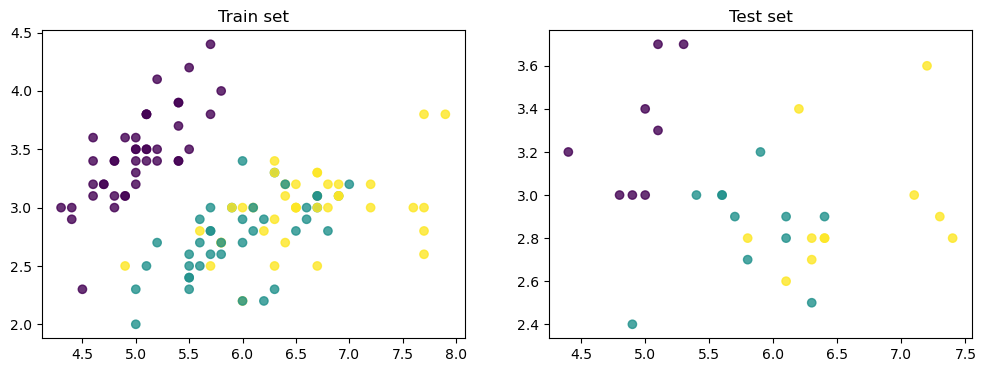

In [6]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.8)
plt.title("Train set")
plt.subplot(122)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, alpha=0.8)
plt.title("Test set")

Maintenant on vas entrainer un modele de machine learning

Model de KNeighborsClassifier(n_neighbors=1)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
#n_neighbors=1 c'est le nbr de voisin le plus proche
model = KNeighborsClassifier(n_neighbors=1) 

In [9]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [10]:
print("Train score : ", model.score(X_train, y_train) )

Train score :  1.0


In [11]:
print("Test score : ", model.score(X_test, y_test) )

Test score :  0.9


In [12]:
X_test.shape

(30, 4)

In [13]:
X_train.shape

(120, 4)

In [14]:
def test(model, x):
    print(model.predict(x))
    print(model.predict_proba(x)) # la proba d'appaertenire a une classe 

In [15]:
#test(model, X_test)

# Validation set  

# Ameliorer le modele

en augmentant le score de notre model 

In [16]:
#n_neighbors=1 c'est le nbr de voisin le plus proche
model = KNeighborsClassifier(n_neighbors=6) 
model.fit(X_train, y_train)
print("Train score : ", model.score(X_train, y_train) )
print("Test score : ", model.score(X_test, y_test) )

Train score :  0.9833333333333333
Test score :  0.9666666666666667


le problemme lorsqu'on test avec le test set il le score ne serat pas credible donc pour ca on vas redecouper notre model en 3 partie :

- Train set 

- Val set : Donc on testera notre model avec apres l'entrainement 

- Test set

et c'est selon le score de val set qu'on vas choisir le le nbr de voisin le plus proche

en suit on vas evaluer le modele sur le test set afin d'avoire une idee dans la vrai vie 

# Cross-Validation

consiste a entrainer puis valider noter modele sur plusieur decoupe possible de train set

il ya plusieur technique pour decouper notre train set avec Cross-Validation : 

- KFlod

- StratifiedKFold : est la technique implementer par defaut 

- ShuffleSplit

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
# Utiliser KNeighborsClassifier avec les paramètres par défaut
# pour créer un classificateur k-NN
# Appliquer une validation croisée avec 5 plis (cv=5)
# et utiliser 'accuracy' comme métrique de performance
scores = cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5, scoring='accuracy')
scores

array([1.        , 1.        , 1.        , 0.95833333, 0.95833333])

Explications détaillées des paramètres:

- KNeighborsClassifier(): Crée un modèle k-NN (k plus proches voisins) avec les paramètres par défaut. Vous pouvez ajuster les paramètres du modèle en fonction de vos besoins.

- X_train, y_train: Les données d'entraînement et les étiquettes associées.

- cv=5: Spécifie le nombre de plis dans la validation croisée. Dans cet exemple, il utilise une validation croisée à 5 plis, ce qui signifie que les données sont divisées en 5 sous-ensembles. Le modèle est entraîné sur 4 plis et testé sur le cinquième, et cela est répété 5 fois (une fois pour chaque pli).

- scoring='accuracy': Utilise la précision comme métrique de performance pour évaluer le modèle. La précision est simplement le nombre de prédictions correctes divisé par le nombre total de prédictions.

La variable scores contiendra les résultats de la validation croisée, c'est-à-dire les scores de précision pour chaque pli. Vous pouvez ensuite utiliser ces scores pour évaluer la performance moyenne du modèle. Par exemple:

In [19]:
print("Scores de validation croisée:", scores)
print("Précision moyenne:", scores.mean())

Scores de validation croisée: [1.         1.         1.         0.95833333 0.95833333]
Précision moyenne: 0.9833333333333334


Une métrique de performance est une mesure quantitative utilisée pour évaluer la performance d'un modèle d'apprentissage automatique. Ces métriques fournissent des informations sur la qualité des prédictions d'un modèle par rapport aux véritables valeurs (étiquettes) des données.

Il existe différentes métriques de performance, et le choix de la métrique dépend du type de problème que vous résolvez (classification, régression, etc.) et des objectifs spécifiques que vous avez. Voici quelques-unes des métriques de performance couramment utilisées :

# Classification:

- Précision (Accuracy) : Le nombre total de prédictions correctes divisé par le nombre total de prédictions.

- Rappel (Recall) : La proportion de vrais positifs parmi tous les exemples réellement positifs.

- F1-score : Une moyenne pondérée de la précision et du rappel.

- Aire sous la courbe ROC (AUC-ROC) : La mesure de l'aire sous la courbe caractéristique de fonctionnement du récepteur (ROC).

# Régression:

- Erreur quadratique moyenne (Mean Squared Error, MSE) : La moyenne des carrés des écarts entre les prédictions et les valeurs réelles.

- Erreur absolue moyenne (Mean Absolute Error, MAE) : La moyenne des valeurs absolues des écarts entre les prédictions et les valeurs réelles.

# Clustering:

- Indice de silhouette : Mesure à quel point un objet est similaire à son propre cluster (cohérence intra-cluster) par rapport aux autres clusters (séparation inter-cluster).

- Homogénéité, Complétude, V-mesure : Mesures pour évaluer la qualité des clusters dans les tâches de clustering.

Lorsque vous évaluez un modèle, il est important de choisir la métrique appropriée en fonction du contexte de votre problème. Par exemple, dans certaines situations, la précision peut être plus importante, tandis que dans d'autres, le rappel ou la spécificité peut être plus critique. Il est également courant d'utiliser plusieurs métriques pour obtenir une image plus complète de la performance du modèle.

Revenant ou on etait:

donc pour savoir pour quelle valeur de n_neighbors=? le score sera le plus eleve on procede tout simplement avec une boucle for 

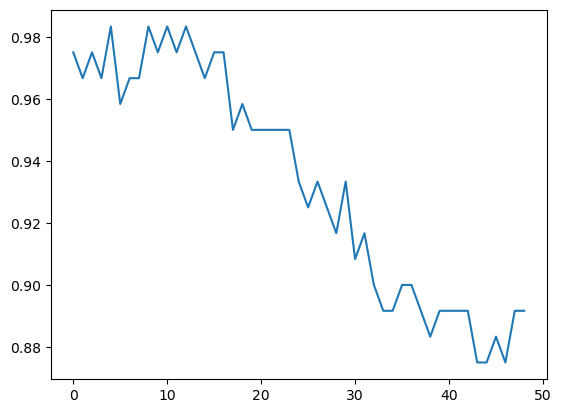

In [20]:
val_score =[]
for k in range(1, 50):
    scores = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5, scoring='accuracy')
    val_score.append(scores.mean())
plt.plot(val_score)

Mais toute cette boucle for on a meme pas besion de l'ecrire puis ce qu'il ya une fonction tout pret pour ca 

# Validation Curve

on vas segmente notre dataset a 3 parties 

- Train set 

- Validation set (val set): et on choisie selon son score dans la validation est le plus eleve

- Test set

valisation_curve(model, X_train, y_train, 'hyperparametre', valeurs, cv=5)

=> train_score & val_score

-> Test toutes les valeurs pour un hyperparametre donnee.

Calcule le score sur Train set et val set grace a la CrossValidation

- Exemple : 49 valeurs sont teste avec cv=5

-> alors train_score & val_score sont de dimensions(49,5)

In [21]:
from sklearn.model_selection import validation_curve

In [22]:
# Créer un modèle KNeighborsClassifier
model = KNeighborsClassifier()

# Définir une plage de valeurs pour le paramètre 'n_neighbors'
k = np.arange(1, 50)

# Utiliser validation_curve pour évaluer les performances du modèle
# en faisant varier le nombre de voisins 'n_neighbors'
# X_train et y_train sont les données d'entraînement et les étiquettes associées
# 'n_neighbors' est le paramètre à faire varier
# k est la plage de valeurs pour 'n_neighbors'
# cv=5 spécifie une validation croisée à 5 plis
train_score , val_score = validation_curve(model, X_train, y_train, param_name='n_neighbors', param_range=k, cv=5)

# Explications détaillées :

- KNeighborsClassifier(): Crée un modèle k-NN (k plus proches voisins) avec les paramètres par défaut.

- np.arange(1, 50): Crée un tableau NumPy contenant les valeurs de 1 à 49. Ces valeurs seront utilisées comme différentes valeurs pour le paramètre n_neighbors.

- validation_curve: Cette fonction de scikit-learn génère des scores de performance pour différentes valeurs d'un paramètre donné en utilisant la validation croisée. Dans ce cas, elle évalue les performances du modèle en faisant varier le nombre de voisins (n_neighbors) de 1 à 49.

- X_train et y_train: Les données d'entraînement et les étiquettes associées.

- 'n_neighbors': Le nom du paramètre que nous voulons faire varier.

- k: La plage de valeurs à essayer pour le paramètre 'n_neighbors'.

- cv=5: Spécifie une validation croisée à 5 plis.

Les résultats sont stockés dans les tableaux train_score et val_score. train_score contient les scores d'entraînement pour chaque valeur de n_neighbors, et val_score contient les scores de validation croisée correspondants. Vous pouvez utiliser ces scores pour visualiser comment les performances du modèle varient en fonction du nombre de voisins. Par exemple, vous pourriez tracer ces résultats pour identifier la meilleure valeur de n_neighbors pour votre problème spécifique.

         -------------------------------------- 
n_neighbors est un hyperparamètre du modèle k-NN (k plus proches voisins). Il représente le nombre de voisins les plus proches à considérer lors de la prédiction d'une nouvelle observation.

L'algorithme k-NN fonctionne en trouvant les k échantillons les plus proches dans l'ensemble d'entraînement pour une nouvelle observation, puis en affectant à cette observation la classe majoritaire parmi ces k voisins. Le choix de la valeur de n_neighbors est crucial car il affecte directement la flexibilité du modèle. Un n_neighbors plus petit rendra le modèle plus flexible et sensible aux fluctuations locales dans les données, tandis qu'un n_neighbors plus grand rendra le modèle plus stable, mais pourrait manquer de détails locaux.

Lorsque vous utilisez la fonction validation_curve pour évaluer les performances du modèle pour différentes valeurs de n_neighbors, vous explorez comment le choix de cet hyperparamètre impacte la qualité des prédictions. La courbe de validation vous aide à identifier la valeur optimale de n_neighbors qui donne les meilleures performances sur les ensembles de validation croisée.

In [23]:
val_score.shape

(49, 5)

Donc pour avoir la moyenne de chaque lign de val_score

In [24]:
val_score.mean(axis=1)

array([0.975     , 0.96666667, 0.975     , 0.96666667, 0.98333333,
       0.95833333, 0.96666667, 0.96666667, 0.98333333, 0.975     ,
       0.98333333, 0.975     , 0.98333333, 0.975     , 0.96666667,
       0.975     , 0.975     , 0.95      , 0.95833333, 0.95      ,
       0.95      , 0.95      , 0.95      , 0.95      , 0.93333333,
       0.925     , 0.93333333, 0.925     , 0.91666667, 0.93333333,
       0.90833333, 0.91666667, 0.9       , 0.89166667, 0.89166667,
       0.9       , 0.9       , 0.89166667, 0.88333333, 0.89166667,
       0.89166667, 0.89166667, 0.89166667, 0.875     , 0.875     ,
       0.88333333, 0.875     , 0.89166667, 0.89166667])

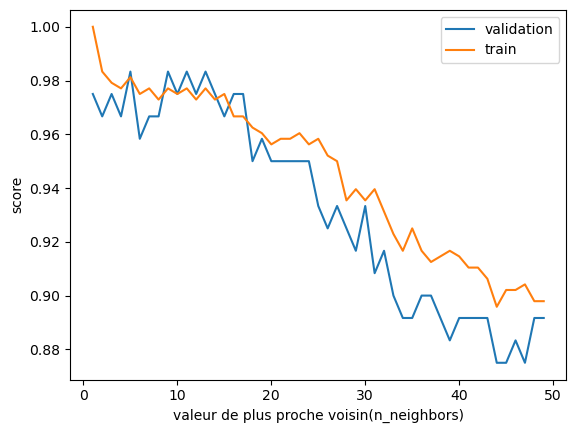

In [25]:
plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')
plt.xlabel("valeur de plus proche voisin(n_neighbors)")
plt.ylabel('score')
plt.legend()

et ca c'est tres utile pour detecter le "Overtfit"
    les erreurs sur le Train diminuent, mais celles sur le Test augmentent

# OverFitting

=> Le modele c'est trop perfectione sur le Trainset et a perdu tout sens de generalisation  

-> Bon Train_score = Mauvais Test_score 

dans le cas des algorithme de KNeighbors on est tres souvent proche d'OverFiting lorsqu'on a un le plus proche voisin = 1 

# GridSearchCV

Grid = GridSearchCV(model, param_grid, cv)

-> Construit une grille de modeles avec toutes les combinaisons d'hyperparametres presents dans param_grid

from sklearn.model_selection import GridSearchCV

on cree un dictionnaire qui contien differ hypers parametre a regle ainsi chaques valeurs a tester pour ces hyper parametre 

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
# Définir la grille des hyperparamètres à explorer
param_grid = {'n_neighbors': np.arange(1, 10),
              'metric': ['euclidean', 'manhattan']}

# Créer un classificateur k-NN
knn = KNeighborsClassifier()

# Utiliser GridSearchCV pour la recherche sur la grille
# - knn est le modèle à optimiser
# - param_grid est la grille des hyperparamètres à explorer
# - cv=5 spécifie une validation croisée à 5 plis
grid = GridSearchCV(knn, param_grid, cv=5)

# Ajuster le modèle à la grille de recherche avec les données d'entraînement
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

Explications détaillées :

- param_grid: C'est un dictionnaire définissant les hyperparamètres à explorer. Dans cet exemple, vous explorez les valeurs de n_neighbors de 1 à 19 et les métriques de distance 'euclidean' et 'manhattan'.

- KNeighborsClassifier(): Crée un modèle k-NN (k plus proches voisins) avec les paramètres par défaut.

- GridSearchCV: Cette classe de scikit-learn effectue une recherche sur la grille des hyperparamètres en utilisant la validation croisée pour évaluer les performances. Les principaux paramètres sont :

- knn: Le modèle à optimiser.

- param_grid: La grille des hyperparamètres à explorer.

- cv=5: Spécifie une validation croisée à 5 plis.

- fit(X_train, y_train): Ajuste le modèle à la grille de recherche en utilisant les données d'entraînement.

Après l'exécution de ce code, les meilleurs hyperparamètres seront stockés dans grid.best_params_ et le meilleur modèle dans grid.best_estimator_. Vous pouvez ensuite utiliser ces informations pour faire des prédictions ou évaluer le modèle sur des ensembles de données distincts.

In [28]:
grid.best_score_

0.9833333333333334

on peut aussi sauvgarder ce modele avec meilleur parametre 

In [29]:
model = grid.best_estimator_

In [30]:
grid.best_estimator_

KNeighborsClassifier(metric='euclidean')

In [31]:
model.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(metric='euclidean')>

In [32]:
parameters = knn.get_params()
print(parameters["n_neighbors"])

5


In [33]:
model.score

<bound method ClassifierMixin.score of KNeighborsClassifier(metric='euclidean')>

In [34]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 5}

- A ce stade on peut utiliser un autre outil de mesure tres utile pour evaluer la qualite d'un modele de Classification.

- Montre les erreurs de classement :

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
confusion_matrix(y_test, model.predict(X_test))

array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 11]], dtype=int64)

# Learning_curve

les courbe d'apprentissage montre l'evolution des performance de notre model en fonction de la quantite de donees qu'on lui fournit 

typiquemnt plus la machine on lui fourni de donnee plus serat milleur sa performance 

pour faire ca dans python on utilise la fonction learning_curve

In [37]:
from sklearn.model_selection import learning_curve

In [38]:
N, train_score, val_score = learning_curve(model, X_train, y_train, 
                                           train_sizes = np.linspace(0.2, 1, 
                                                                    10), 
                                           cv=5 )

In [39]:
print(N)
print(val_score)

[19 27 36 44 53 61 70 78 87 96]
[[1.         0.91666667 0.95833333 0.95833333 0.95833333]
 [1.         1.         1.         0.95833333 0.95833333]
 [1.         1.         1.         0.95833333 0.95833333]
 [1.         1.         1.         0.95833333 0.95833333]
 [1.         1.         1.         0.95833333 0.95833333]
 [1.         1.         1.         0.95833333 0.91666667]
 [1.         1.         1.         0.95833333 0.91666667]
 [1.         0.95833333 1.         0.95833333 0.95833333]
 [1.         1.         1.         0.95833333 0.95833333]
 [1.         1.         1.         0.95833333 0.95833333]]


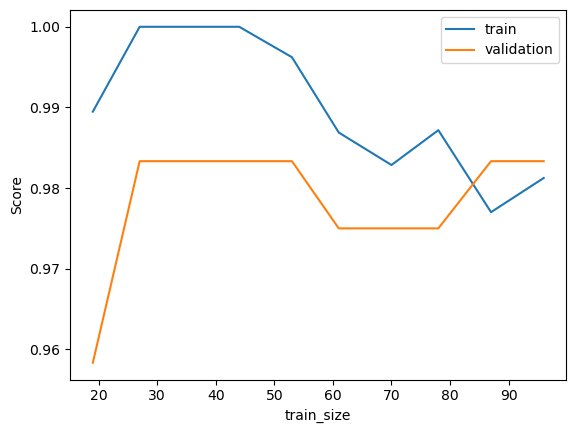

In [40]:
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_size')
plt.ylabel("Score")
plt.legend()
plt.show()

# Problemme non identifier

pour quoi le GridSearchCV ne ma pas donnee les milleurs parametres ? 

In [41]:
#n_neighbors=1 c'est le nbr de voisin le plus proche
model = KNeighborsClassifier(n_neighbors=10) 
model.fit(X_train, y_train)
print("Train score : ", model.score(X_train, y_train) )
print("Test score : ", model.score(X_test, y_test) )

Train score :  0.9833333333333333
Test score :  0.9666666666666667


In [42]:
N, train_score, val_score = learning_curve(model, X_train, y_train, 
                                           train_sizes = np.linspace(0.2, 1, 5), 
                                           cv=5 )

In [43]:
print(N)
print(val_score)

[19 38 57 76 96]
[[0.91666667 0.79166667 0.875      0.91666667 0.875     ]
 [1.         0.95833333 0.91666667 1.         0.95833333]
 [1.         0.91666667 1.         0.95833333 0.95833333]
 [1.         1.         0.95833333 0.95833333 0.95833333]
 [1.         1.         0.95833333 0.95833333 0.95833333]]


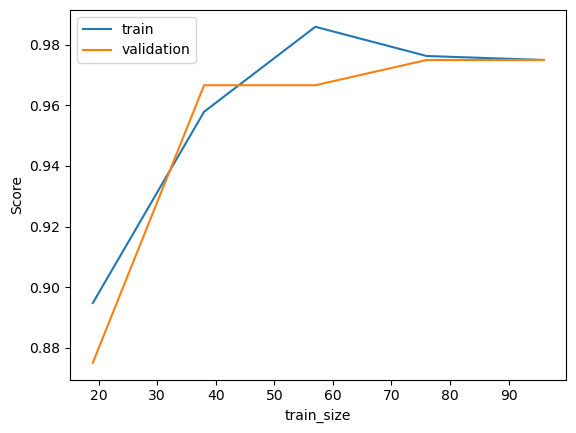

In [44]:
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_size')
plt.ylabel("Score")
plt.legend()
plt.show()

1. Commencer toujours a deviser votre dataset avec la fonction train_test_split()

2. ensuit vous pouvez utiliser l'optimisateur GridSearchCV()
 pour touver les milleur parametres pour notre modele

cette technique utilise la cross_valisation 

on doit definire le nombre de split et optionnellement a definire la srategie de decoupage qui nous interesse

3. pour evaluer notre modele on peut charger n'import quel metric depuis le module "from sklearn.metrics import confusion_matrix"

Et pour finire on doit utiliser les courbes de validations et les courbe d'apprentissage pour verifier si on est pas en overfiting et pour verifier si on peut encore améliorer notre modele avec plus de donnee

In [45]:
score_train = []
score_test = []

best_k = 1
best_score_train = 0
best_score_test = 0

for k in range(best_k, 30):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x,y)
    score_train.append(model.score(X_train, y_train))
    score_test.append(model.score(X_test, y_test))
    
    if best_score_train < model.score(X_train, y_train) and best_score_test < model.score(X_test, y_test) :
        best_k = k
        best_score_train = model.score(X_train, y_train)
        best_score_test = model.score(X_test, y_test)
        
print(best_k)
#plt.plot(score_train, label='score_train')
#plt.plot(score_test, label='score_test')
#plt.xlabel('k')
#plt.ylabel("Score")
#plt.legend()
#plt.show()

1


In [46]:
# Créer un modèle KNeighborsClassifier
model = KNeighborsClassifier()
k = np.arange(1, 50)
train_score , val_score = validation_curve(model, X_train, y_train, param_name='n_neighbors', param_range=k, cv=5)

In [51]:
score_train = []
score_test = []

best_k = 1
best_score_train = 0
best_score_val = 0

for k in range(best_k, 49):

    if np.any(best_score_train < train_score[k]) and np.any(best_score_val < val_score[k]):
        best_k = k
        best_score_train = train_score[k]
        best_score_val = val_score[k]
        
print(best_k)

4


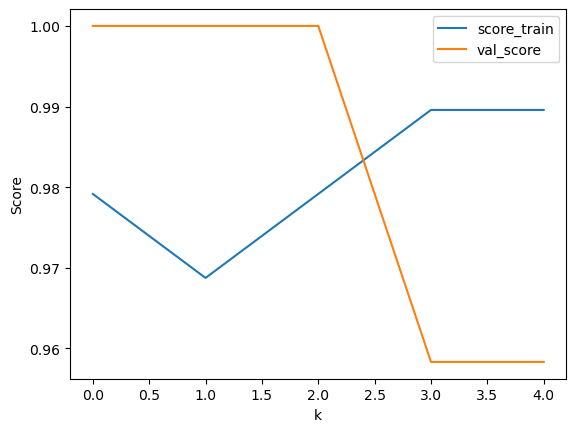

In [54]:
plt.plot(best_score_train, label='score_train')
plt.plot(best_score_val, label='val_score')
plt.xlabel('k')
plt.ylabel("Score")
plt.legend()
plt.show()

In [ ]:
#n_neighbors=1 c'est le nbr de voisin le plus proche
model = KNeighborsClassifier(n_neighbors=2.5) 
model.fit(X_train, y_train)
print("Train score : ", model.score(X_train, y_train) )
print("Test score : ", model.score(X_test, y_test) )